In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

sales = pd.read_csv('C:/Users/DELL PC/sales_data.csv')
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
sales["Date"] = sales["Date"].apply(lambda x: x.replace("-", "/"))
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013/11/26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015/11/26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014/03/23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016/03/23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014/05/15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
sales['Date'] = pd.to_datetime(sales['Date']) 
sales.dtypes

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Category                object
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Cost                         int64
Revenue                      int64
dtype: object

In [5]:
sales_results = sales.groupby('Day').sum()

In [6]:
sales.groupby('Day').sum()['Profit']

Day
1     1014424
2      981368
3     1173341
4      993361
5     1015348
6     1091235
7     1165963
8     1105405
9      971637
10     919033
11    1105297
12    1134957
13    1052639
14    1145536
15    1093303
16     934683
17    1099755
18    1031260
19    1161911
20    1128301
21     991485
22     989149
23    1010560
24    1281908
25     975814
26    1037413
27     979763
28    1063242
29     937231
30    1011397
31     624381
Name: Profit, dtype: int64

Text(0, 0.5, 'Profit')

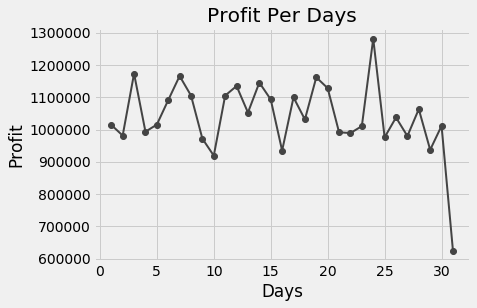

In [7]:
plt.style.use('fivethirtyeight')

days = sales_results.index
profit = sales_results['Profit']

plt.plot(days, profit, color="#444444", linewidth=2, marker='o')

plt.title('Profit Per Days')
plt.xlabel('Days')
plt.ylabel('Profit')


In [8]:
sales_results = sales.groupby('Country').mean()
sales_results

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Country,,,,,,,,,
Australia,15.720254,2014.303016,34.383941,11.012074,364.062834,612.109041,283.089489,606.869527,889.959016
Canada,15.501340,2014.453096,36.238962,13.560375,133.626605,228.692058,262.187615,297.534349,559.721964
France,15.783779,2014.435079,35.116930,11.728951,292.174941,492.476632,261.891435,504.872704,766.764139
Germany,15.575419,2014.446837,34.868084,11.328167,300.882682,507.964678,302.756803,506.271490,809.028293
United Kingdom,15.681645,2014.428267,35.551836,11.543172,269.370925,455.623789,324.071439,457.587592,781.659031
United States,15.678876,2014.412105,37.391114,12.180253,239.350559,409.255318,282.447687,431.105009,713.552696


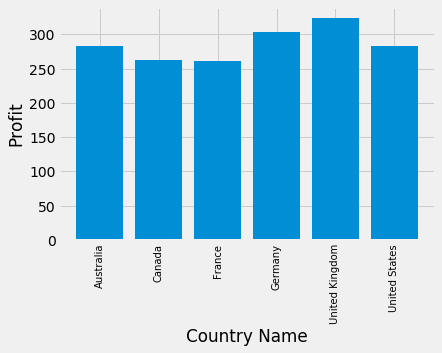

In [9]:
countries = [country for country, df in sales.groupby('Country')]

plt.bar(countries, sales_results['Profit'])
plt.xticks(countries, rotation ='vertical', size=10)
plt.xlabel('Country Name')
plt.ylabel('Profit')
plt.show()

In [10]:
sales_revenue = sales.groupby('Country').mean()['Revenue']
sales_revenue

Country
Australia         889.959016
Canada            559.721964
France            766.764139
Germany           809.028293
United Kingdom    781.659031
United States     713.552696
Name: Revenue, dtype: float64

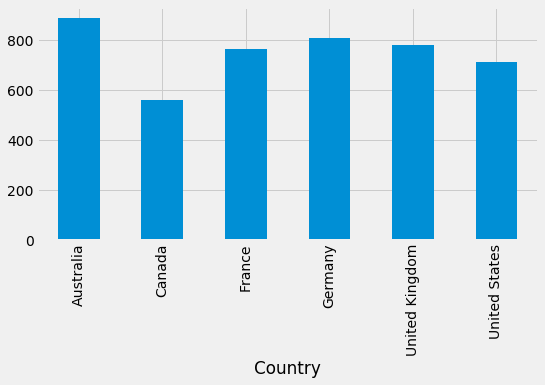

In [11]:
fig,axes = plt.subplots(figsize=(8,4))
revenue_plot = sales_revenue.plot(kind='bar')

In [14]:
years = sales.groupby('Year').count().sort_values('Product',ascending=False).head(5)

years.reset_index(inplace=True)
years

,Year,Date,Day,Month,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2014,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398
1,2016,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398,29398
2,2013,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443
3,2015,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443
4,2011,2677,2677,2677,2677,2677,2677,2677,2677,2677,2677,2677,2677,2677,2677,2677,2677,2677


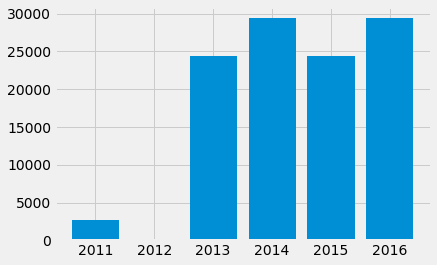

In [15]:
plt.bar(years.Year,years.Product);

In [16]:
month_order = sales.groupby('Month')[['Profit','Cost','Revenue']].sum()

month_order

,Profit,Cost,Revenue
Month,,,
April,2864719,4738031,7602750
August,2214204,3496989,5711193
December,3409712,5677219,9086931
February,2562322,4272261,6834583
January,2618521,4387374,7005895
July,2139750,3581709,5721459
June,3383583,5659425,9043008
March,2761866,4585298,7347164
May,3326937,5509826,8836763


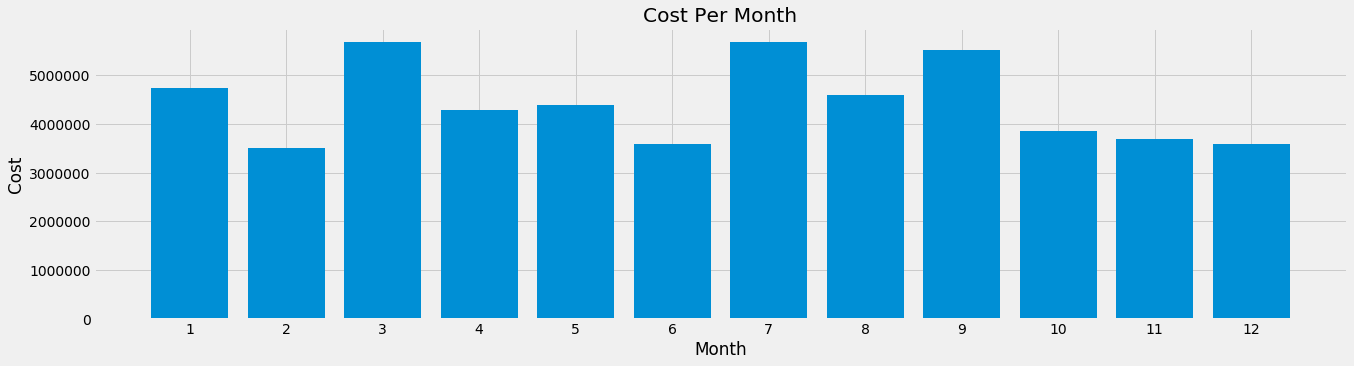

In [17]:
plt.figure(figsize = (20,5))

plt.bar(range(1,13), month_order['Cost'])

plt.title('Cost Per Month')

plt.xticks(range(1,13))

plt.xlabel('Month')

plt.ylabel('Cost') ;

In [18]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [19]:
best_selling_prods = pd.DataFrame(sales.groupby('Product').sum()['Order_Quantity'])

In [20]:
best_selling_prods.sort_values(by=['Order_Quantity'], inplace=True, ascending=False)
best_selling_prods[:10]

,Order_Quantity
Product,
Water Bottle - 30 oz.,164086
Patch Kit/8 Patches,157583
Mountain Tire Tube,102792
AWC Logo Cap,67316
"Sport-100 Helmet, Red",63663
Road Tire Tube,62296
Fender Set - Mountain,62118
"Sport-100 Helmet, Black",62105
Touring Tire Tube,56802


In [21]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [22]:
sales['Month'] = sales['Date'].apply(lambda x: x.strftime('%Y-%m'))

In [23]:
sales_temp = sales.groupby('Month').sum()['Profit'].reset_index()

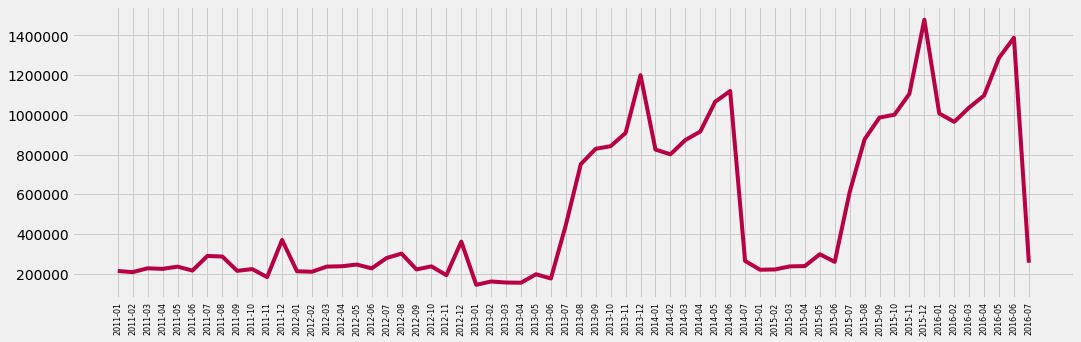

In [24]:
plt.figure(figsize=(16, 5))
plt.plot(sales_temp['Month'], sales_temp['Profit'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

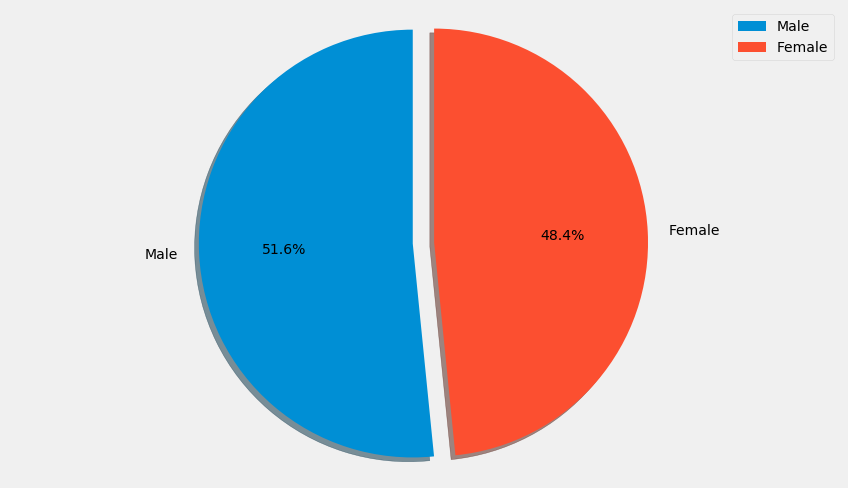

In [25]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(sales['Customer_Gender'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

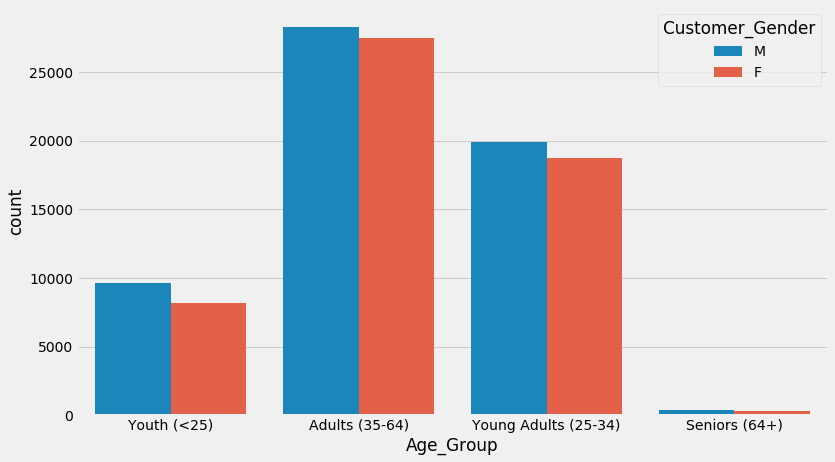

In [27]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sb.countplot(sales['Age_Group'],hue=sales['Customer_Gender'])